In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [3]:
[np.sum(y==int(1))/y.shape[0], np.sum(y==int(0))/y.shape[0]]

[0.23919308357348704, 0.760806916426513]

In [2]:
# define REAL feature names e.g., EEPD_1, EEPD_2, MFMC_1,
feature_names = df.columns[-42:]
feature_names
# feature_names = ['EEPD_1', 'EEPD_2', ...]

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
       'feature37', 'feature38', 'feature39', 'feature40', 'feature41',
       'feature42'],
      dtype='object')

### Train a Random Forest Model

In [3]:
rfc = RandomForestClassifier(random_state=0)
#rfc = RandomForestClassifier(n_estimators= 25, random_state=0)

rfc = rfc.fit(X_train,Y_train)

score_train = rfc.score(X_train,Y_train)
score_test = rfc.score(X_test,Y_test)
# f1 score, precision, recall

print("Random Forest accuracy: train {:.3f}, test {:.3f}".format(score_train, score_test))

Random Forest accuracy: train 1.000, test 0.760


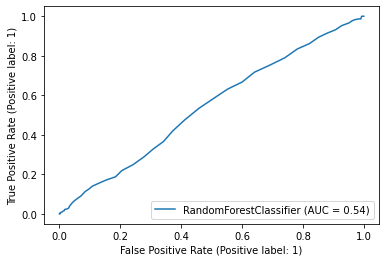

In [4]:
from sklearn.metrics import RocCurveDisplay
y_pred = rfc.predict_proba(X_test)
# plot roc curve
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test)
plt.show()

In [ ]:
# plot feature importance
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize = (10,12))
plt.barh(feature_names[sorted_idx], rfc.feature_importances_[sorted_idx]/max(rfc.feature_importances_))
plt.xlabel("Feature Importance")
plt.title('Random Forest Feature Importance')
plt.show()

In [10]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, Y_train, cv=5)
scores

array([0.75085714, 0.75428571, 0.74828375, 0.75057208, 0.74942792])

### Train Logistic Regression

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [45]:
df = LogisticRegression(solver = 'lbfgs')

df.fit(X_train,Y_train) 
y_pred = df.predict(X_test) 

df.predict(X_train[0:10])
predictions = df.predict(X_train)

score = df.score(X_test, Y_test)
print(score)


0.7652081109925294


### Train SVM (try different kernels)

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [20]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)


In [19]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7604055496264674


### Train Naive Bayes

In [86]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [87]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

print("Naive Bayes score: ",nb.score(X_test, Y_test))

Naive Bayes score:  0.7504
